In [1]:
from __future__ import division, print_function
import os, glob, matplotlib.pyplot as plt, numpy as np, pandas as pd, math, re, itertools
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=6, suppress=True)
#%matplotlib notebook
%matplotlib inline

In [6]:
df, grad = {}, {}
duration, subjects, levels = [], [], []

for file in glob.glob(os.path.join('..', 'datadir', 'pilot', '*csv')):
    df_ = pd.read_csv(file, '\t')

    _, fname = os.path.split(file)
    fname, ext = fname.split('.')
    date, time, _, level, subj = fname.split('_')

    if subj not in subjects:
        subjects.append(subj)
    if level not in levels:
        levels.append(level)

    try:
        df[subj][level] = {}
        grad[subj][level] = {}
    except:
        df[subj] = {}
        df[subj][level] = {}
        grad[subj] = {}
        grad[subj][level] = {}

    for axis in ['T', 'X', 'Y']:
        for obj in ['gaze', 'ball', 'paddle']:
            df[subj][level][axis+obj] = df_[axis+obj]

    N_start, N_stop = 0, int((df[subj][level]['Tgaze'][len(df[subj][level]['Tgaze'])-1] - df[subj][level]['Tgaze'][0])*30)

    # find the moment when the ball collide with an element from below
    grad_, t_rebound_, value_old, value_older = [], [], 0, 0
    for k, value in enumerate(np.gradient(df[subj][level]['Yball'])[N_start:N_stop]):        
        if value > 0 and  value_older < 0:
            grad_.append(k)
        """if value < 0 and  value_older > 0:
            grad_.append(k)"""
                
        value_older = value_old
        value_old = value

    grad[subj][level] = grad_

In [3]:
lvls_mix = [[[1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1, 1, 1, 5, 1],
         [1, 5, 1, 5, 1, 5, 5, 5, 5],
         [5, 5, 1, 5, 1, 5, 1, 5, 5],
         [5, 1, 1, 5, 0, 1, 5, 5, 1],
         [5, 1, 5, 1, 5, 1, 1, 1, 1],
         [5, 1, 1, 5, 5, 5, 5, 1, 1],
         [5, 1, 5, 1, 5, 5, 5, 1, 1],
         [5, 5, 5, 5, 1, 1, 1, 5, 1],
         [1, 1, 5, 5, 1, 5, 5, 1, 5]],

        [[5, 1, 5, 5, 1, 5, 1, 3, 1],
         [1, 3, 5, 3, 5, 3, 3, 3, 3],
         [3, 3, 1, 3, 1, 3, 5, 3, 3],
         [3, 1, 5, 3, 0, 1, 3, 3, 1],
         [3, 5, 3, 1, 3, 1, 1, 5, 1],
         [3, 1, 5, 3, 3, 3, 3, 1, 5],
         [3, 5, 3, 5, 3, 3, 3, 1, 5],
         [3, 3, 3, 3, 5, 5, 1, 3, 5],
         [1, 5, 3, 3, 5, 3, 3, 1, 3]],

        [[2, 2, 2, 2, 2, 2, 2, 4, 2],
         [2, 4, 2, 4, 2, 4, 4, 4, 4],
         [4, 4, 2, 4, 2, 4, 2, 4, 4],
         [4, 2, 2, 4, 0, 2, 4, 4, 2],
         [4, 2, 4, 2, 4, 2, 2, 2, 2],
         [4, 2, 2, 4, 4, 4, 4, 2, 2],
         [4, 2, 4, 2, 4, 4, 4, 2, 2],
         [4, 4, 4, 4, 2, 2, 2, 4, 2],
         [2, 2, 4, 4, 2, 4, 4, 2, 4]],

        [[2, 1, 2, 2, 1, 2, 1, 4, 1],
         [1, 3, 2, 4, 2, 4, 3, 4, 4],
         [3, 3, 1, 4, 1, 3, 2, 4, 3],
         [3, 1, 2, 3, 0, 1, 3, 3, 1],
         [4, 2, 3, 1, 4, 1, 1, 2, 1],
         [4, 1, 2, 4, 3, 3, 4, 1, 2],
         [3, 2, 3, 2, 3, 4, 3, 1, 2],
         [4, 3, 4, 4, 2, 2, 1, 3, 2],
         [1, 2, 4, 4, 2, 4, 4, 1, 3]],

        [[2, 1, 2, 2, 2, 2, 1, 5, 1],
         [1, 4, 3, 5, 3, 5, 3, 5, 4],
         [4, 3, 1, 5, 1, 3, 3, 4, 3],
         [4, 2, 3, 4, 0, 1, 4, 4, 2],
         [5, 2, 3, 1, 5, 1, 2, 3, 1],
         [5, 1, 3, 5, 4, 3, 5, 1, 2],
         [3, 2, 4, 2, 3, 5, 4, 1, 3],
         [5, 4, 4, 5, 3, 2, 1, 4, 2],
         [1, 2, 5, 5, 2, 4, 5, 1, 4]]]

lvls_mono = [[[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 0, 0, 0, 1, 1, 1]],

             [[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [2, 2, 2, 2, 2, 2, 2, 2, 2],
              [2, 2, 2, 2, 2, 2, 2, 2, 2],
              [2, 2, 2, 2, 2, 2, 2, 2, 2],
              [2, 2, 2, 2, 2, 2, 2, 2, 2],
              [2, 2, 2, 2, 2, 2, 2, 2, 2],
              [2, 2, 2, 2, 2, 2, 2, 2, 2],
              [2, 2, 2, 0, 0, 0, 2, 2, 2]],

             [[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [3, 3, 3, 3, 3, 3, 3, 3, 3],
              [3, 3, 3, 3, 3, 3, 3, 3, 3],
              [3, 3, 3, 3, 3, 3, 3, 3, 3],
              [3, 3, 3, 3, 3, 3, 3, 3, 3],
              [3, 3, 3, 3, 3, 3, 3, 3, 3],
              [3, 3, 3, 3, 3, 3, 3, 3, 3],
              [3, 3, 3, 0, 0, 0, 3, 3, 3]],

             [[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [4, 4, 4, 4, 4, 4, 4, 4, 4],
              [4, 4, 4, 4, 4, 4, 4, 4, 4],
              [4, 4, 4, 4, 4, 4, 4, 4, 4],
              [4, 4, 4, 4, 4, 4, 4, 4, 4],
              [4, 4, 4, 4, 4, 4, 4, 4, 4],
              [4, 4, 4, 4, 4, 4, 4, 4, 4],
              [4, 4, 4, 0, 0, 0, 4, 4, 4]],

             [[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [5, 5, 5, 5, 5, 5, 5, 5, 5],
              [5, 5, 5, 5, 5, 5, 5, 5, 5],
              [5, 5, 5, 5, 5, 5, 5, 5, 5],
              [5, 5, 5, 5, 5, 5, 5, 5, 5],
              [5, 5, 5, 5, 5, 5, 5, 5, 5],
              [5, 5, 5, 5, 5, 5, 5, 5, 5],
              [5, 5, 5, 0, 0, 0, 5, 5, 5]],

             [[2, 1, 2, 2, 2, 2, 1, 5, 1],
              [1, 4, 3, 5, 3, 5, 3, 5, 4],
              [4, 3, 1, 5, 1, 3, 3, 4, 3],
              [4, 2, 3, 4, 0, 1, 4, 4, 2],
              [5, 2, 3, 1, 5, 1, 2, 3, 1],
              [5, 1, 3, 5, 4, 3, 5, 1, 2],
              [3, 2, 4, 2, 3, 5, 4, 1, 3],
              [5, 4, 4, 5, 3, 2, 1, 4, 2],
              [1, 2, 5, 5, 2, 4, 5, 1, 4],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0]]]

In [17]:
deltav = 10000
t_mean, lvl, t_sacc, t_rebound, p, t_mean_, lvl_sep, separation_ = {}, {}, {}, {}, {}, [], {}, {}
separation, time, p_, t_rebound_ = {}, {}, {}, {}
for subj in subjects:
    print("Subject: ", subj)
    t_mean[subj], lvl[subj], p[subj], t_sacc[subj], t_rebound[subj], lvl_sep[subj] = [], [], [], [], [], []
    separation[subj], time[subj], separation_[subj], p_[subj], t_rebound_[subj] = {}, {}, [], [], []

    for level in levels:
        separation[subj][level], time[subj][level] = [], []

        print(level)
        lvl_sep[subj].append(df[subj][level]['Tgaze'][len(df[subj][level]['Tgaze'])-1] - df[subj]['lvl1']['Tgaze'][0])
        for v in grad[subj][level]:
            if df[subj][level]['Yball'][v] > 61:
                distance = (df[subj][level]['Ygaze'][v] - df[subj][level]['Yball'][v])**2 + (df[subj][level]['Xgaze'][v] - df[subj][level]['Xball'][v])**2
                distance = np.sqrt(distance)

                distance_ = (df[subj][level]['Ygaze'][v-0] - df[subj][level]['Yball'][v])**2 + (df[subj][level]['Xgaze'][v-0] - df[subj][level]['Xball'][v])**2
                distance_ = np.sqrt(distance_)
                #print(distance_)
                separation[subj][level].append(distance_)
                if subj in ['remi', 'valerie', 'jade', 'thys', 'bruno']:
                    for x, y in itertools.product(range(9), range(11)):
                        if 41+x*139 <= df[subj][level]['Xball'][v] < 180+x*139 and 38+y*45 <= df[subj][level]['Yball'][v] < 83+y*45:
                            p_[subj].append(lvls_mono[int(re.findall(r'\d+', level)[0]) - 1][y][x])
                            t_rebound_[subj].append(df[subj][level]['Tgaze'][v])
                            separation_[subj].append(distance_)

                time[subj][level].append(df[subj][level]['Tgaze'][v]-df[subj][level]['Tgaze'][0])

                if distance < 200:
                    i = v-1
                    dist = (df[subj][level]['Ygaze'][v:v+deltav] - df[subj][level]['Yball'][v])**2 + (df[subj][level]['Xgaze'][v:v+deltav] - df[subj][level]['Xball'][v])**2
                    dist = np.sqrt(dist)
                    derivate = np.diff(dist)
                    if len(dist) != len(derivate):
                        derivate = np.append(derivate, np.nan)
                    for d in dist:
                        i += 1
                        if derivate[i-v] > 30:
                            print(df[subj][level]['Xball'][v], df[subj][level]['Yball'][v])
                            """Niveaux Mixtes"""
                            if subj in ['juliette', 'elisa', 'maxime']:
                                for x, y in itertools.product(range(9), range(9)):
                                    if 41+x*139 <= df[subj][level]['Xball'][v] < 180+x*139 and 38+y*45 <= df[subj][level]['Yball'][v] < 83+y*45:
                                        p[subj].append(lvls_mix[int(re.findall(r'\d+', level)[0]) - 1][y][x])
                                        t_sacc[subj].append(df[subj][level]['Tgaze'][i]-df[subj][level]['Tgaze'][v])
                                        #print(lvls_mix[int(re.findall(r'\d+', level)[0]) - 1][y][x])
                                        t_rebound[subj].append(df[subj][level]['Tgaze'][v])

                            """Niveaux Monochromatiques"""
                            if subj in ['remi', 'valerie', 'jade', 'thys', 'bruno']:
                                for x, y in itertools.product(range(9), range(11)):
                                    if 41+x*139 <= df[subj][level]['Xball'][v] < 180+x*139 and 38+y*45 <= df[subj][level]['Yball'][v] < 83+y*45:
                                        p[subj].append(lvls_mono[int(re.findall(r'\d+', level)[0]) - 1][y][x])
                                        t_sacc[subj].append(df[subj][level]['Tgaze'][i]-df[subj][level]['Tgaze'][v])
                                        print(lvls_mono[int(re.findall(r'\d+', level)[0]) - 1][y][x])
                                        t_rebound[subj].append(df[subj][level]['Tgaze'][v])
                            break

        if np.std(t_sacc[subj]) < 10/10*np.mean(t_sacc[subj]):
            t_mean[subj].append(np.mean(t_sacc[subj]))
            t_mean_.append(np.mean(t_sacc[subj]))
            lvl[subj].append(re.findall(r'\d+', level)[0])
            print(np.mean(t_sacc[subj]), '+/-', np.std(t_sacc[subj]))

print(lvl)

Subject:  juliette
lvl1
515.0 438.0
370.0 436.0
121.0 434.0
382.0 392.0
367.0 348.0
220.0 440.0
203.0 343.0
342.0 303.0
193.0 258.0
383.0 118.0
107.0 386.0
59.0 345.0
104.0 304.0
226.0 207.0
200.0 165.0
476.0 342.0
624.0 432.0
631.0 387.0
71.0 253.0
778.0 390.0
1032.0 436.0
1027.0 393.0
1053.0 342.0
1197.0 439.0
1085.0 298.0
1061.0 258.0
1233.0 392.0
751.0 122.0
61.0 212.0
108.0 167.0
76.0 123.0
77.0 71.0
807.0 72.0
1180.0 346.0
1071.0 213.0
1042.0 118.0
1165.0 304.0
1231.0 255.0
0.365631617998 +/- 0.170263798545
lvl2
817.0 388.0
900.0 123.0
1080.0 252.0
1060.0 214.0
797.0 345.0
1164.0 393.0
838.0 135.0
821.0 297.0
737.0 122.0
756.0 75.0
586.0 284.0
609.0 251.0
684.0 161.0
1024.0 169.0
522.0 296.0
473.0 210.0
487.0 161.0
497.0 123.0
104.0 435.0
398.0 393.0
357.0 342.0
169.0 354.0
221.0 438.0
349.0 301.0
1227.0 343.0
1165.0 301.0
1213.0 252.0
420.0 253.0
341.0 211.0
102.0 386.0
222.0 74.0
78.0 344.0
495.0 74.0
1229.0 214.0
1241.0 163.0
1147.0 121.0
1210.0 79.0
66.0 78.0
0.344105303288 +

C:\Users\Syht\Documents\Stage_LNC\Python\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


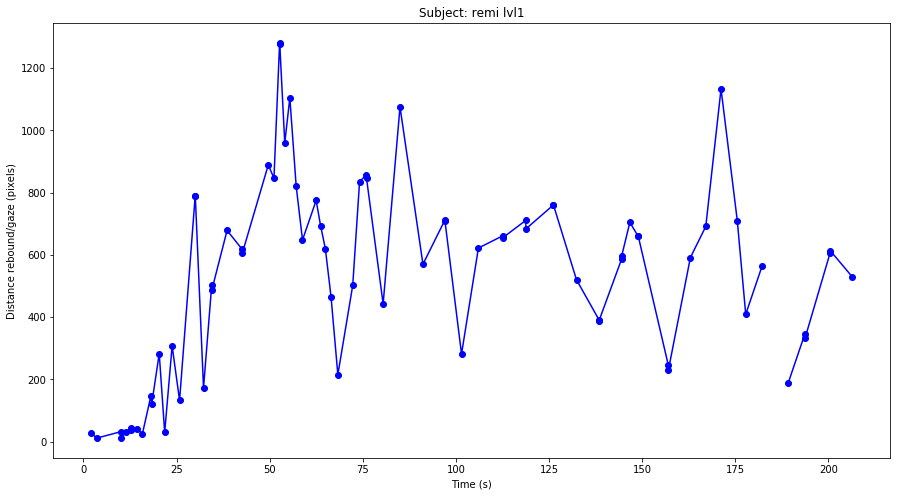

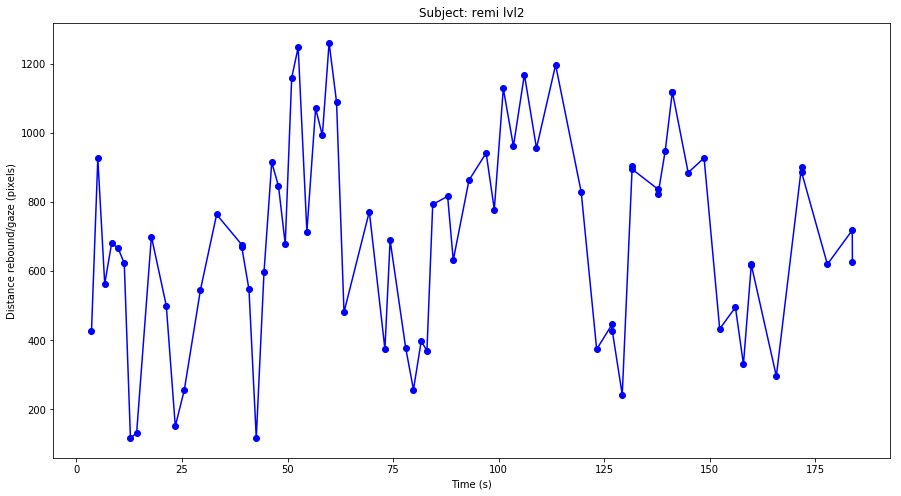

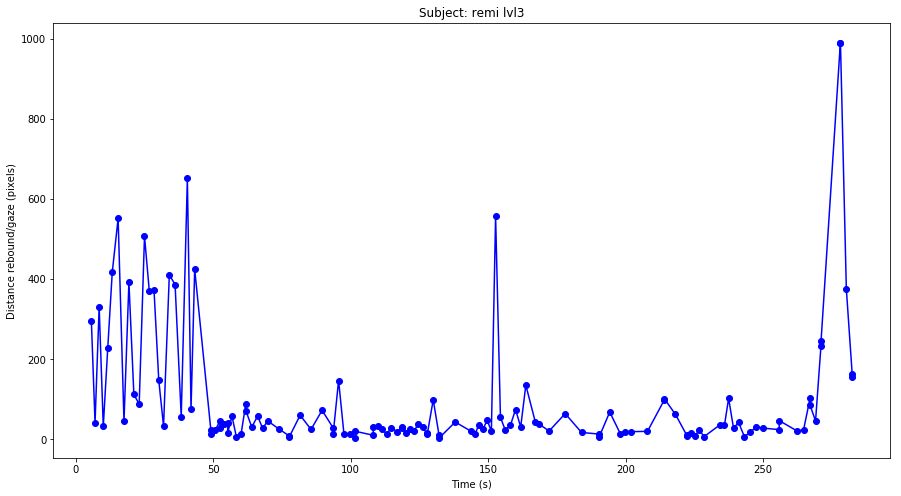

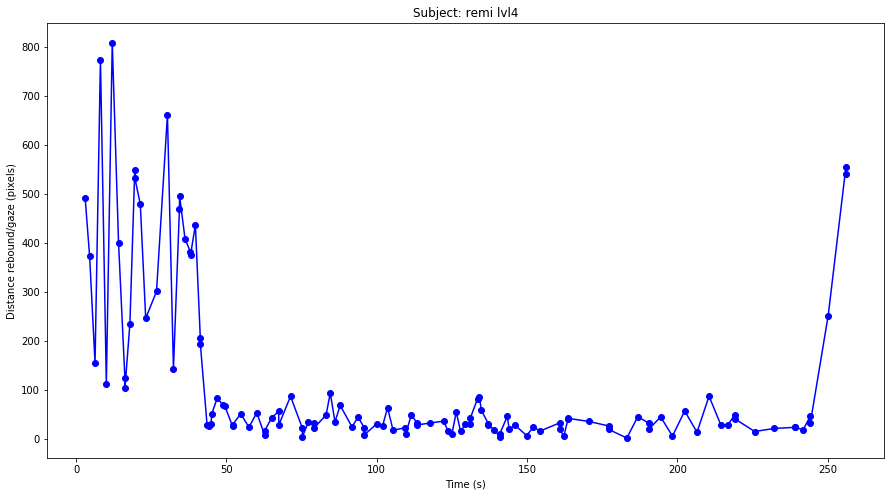

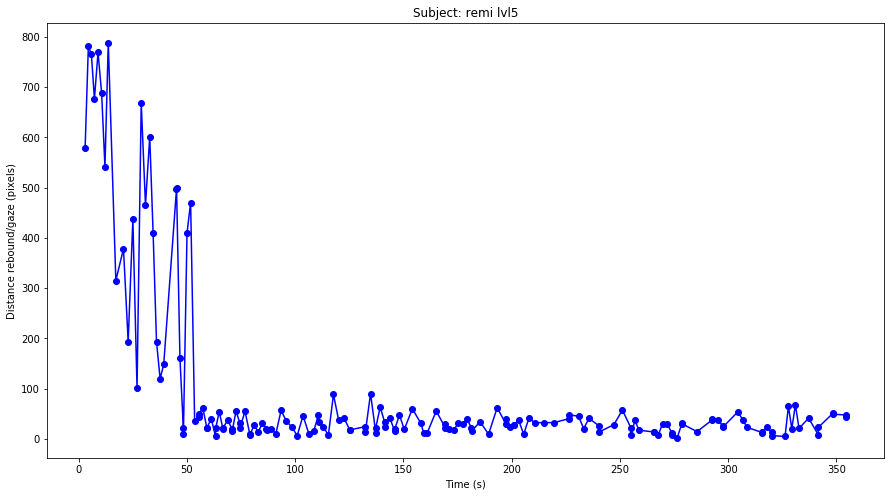

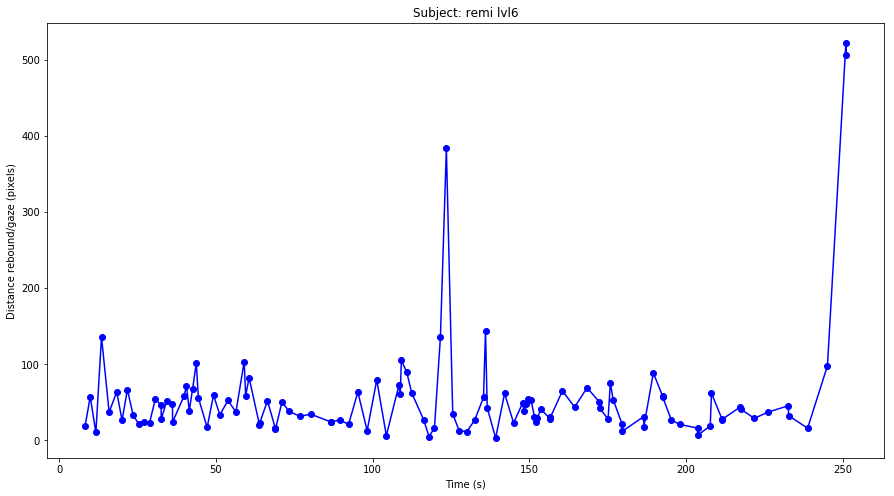

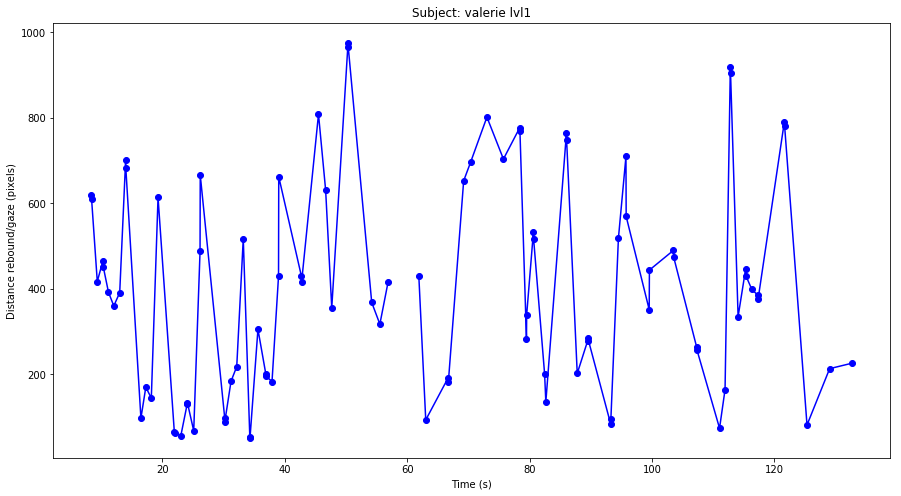

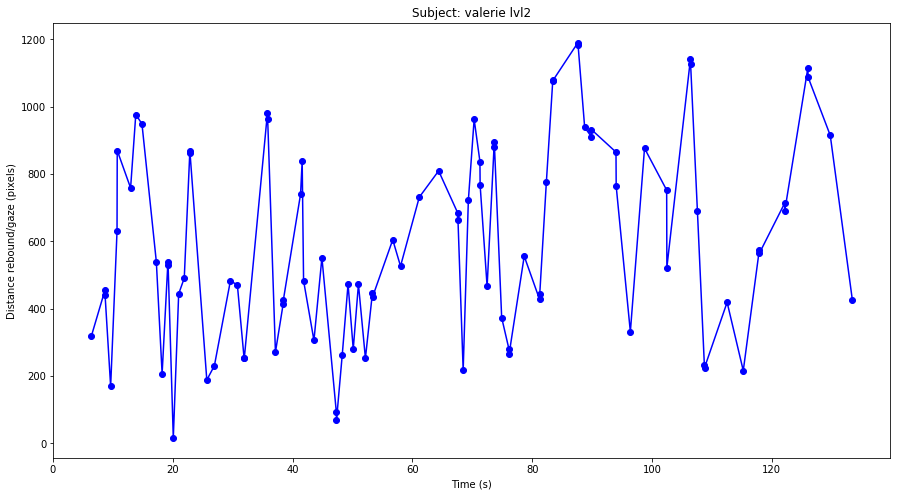

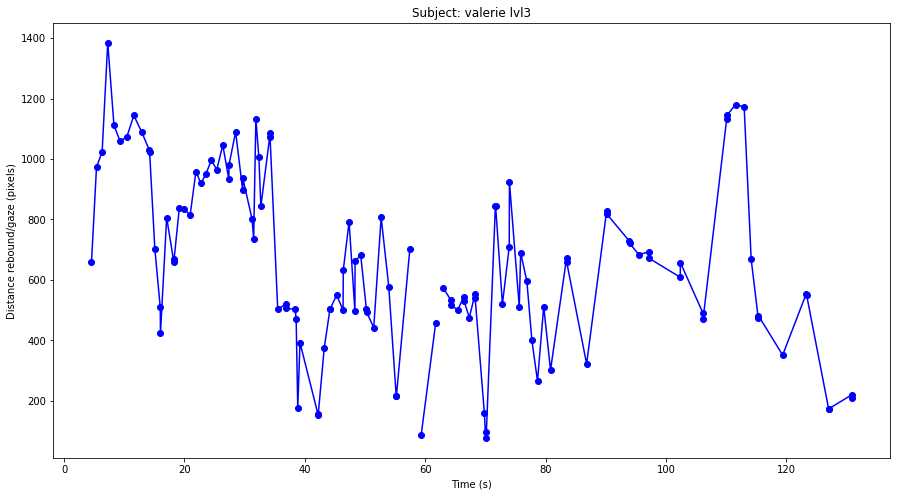

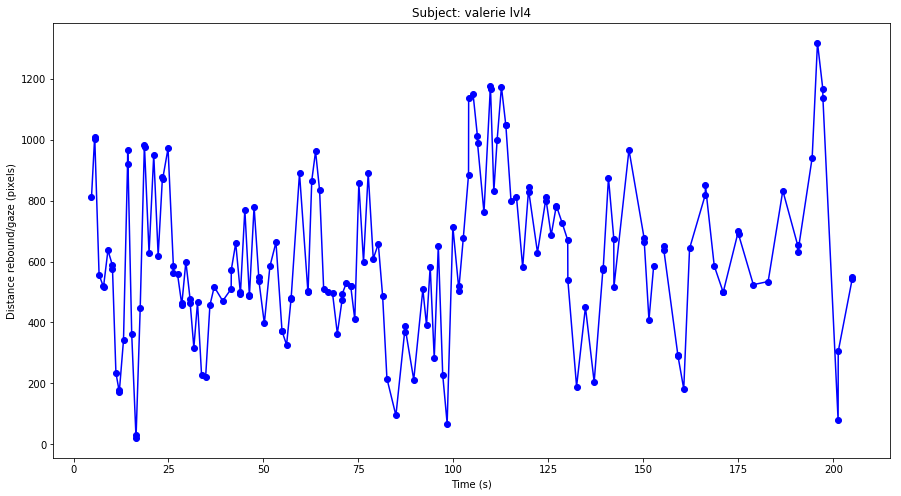

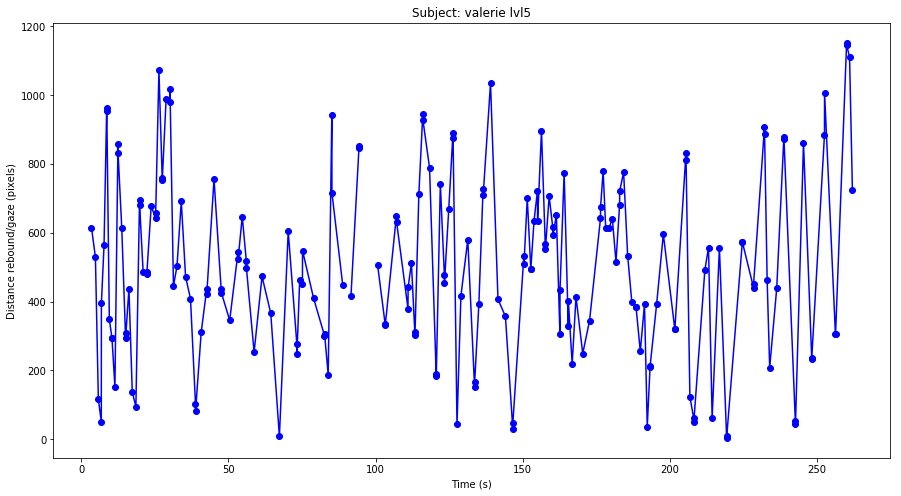

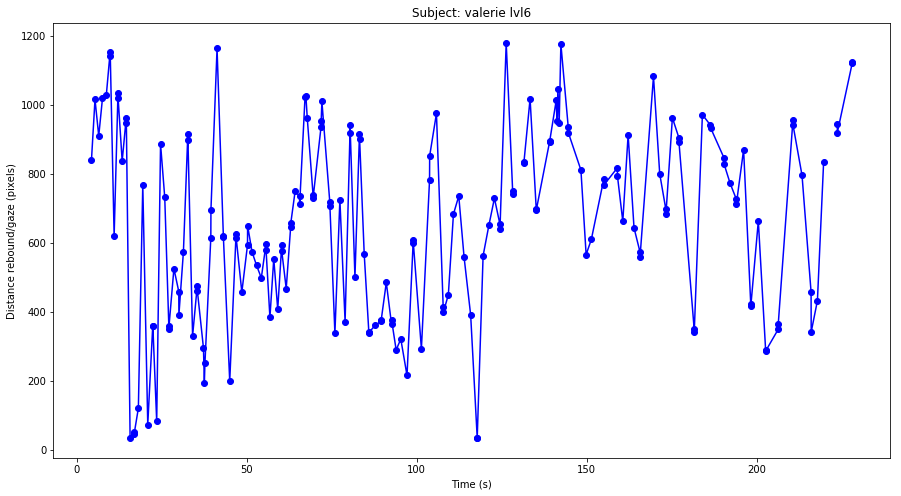

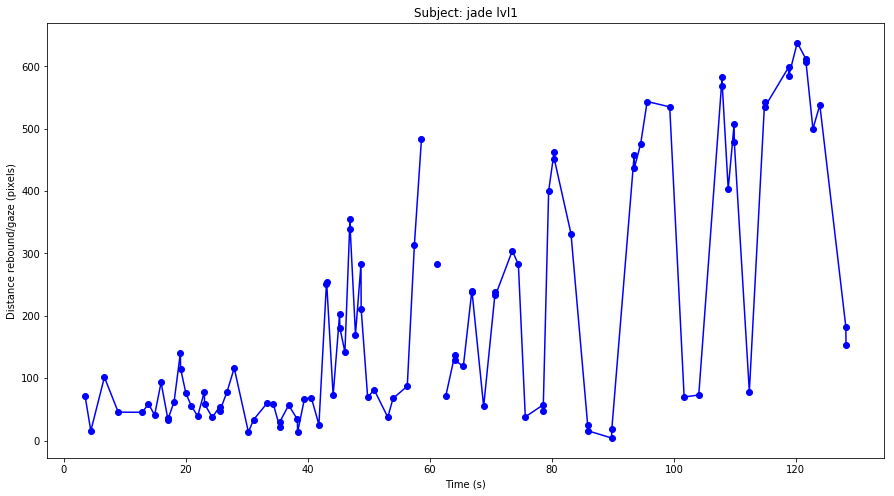

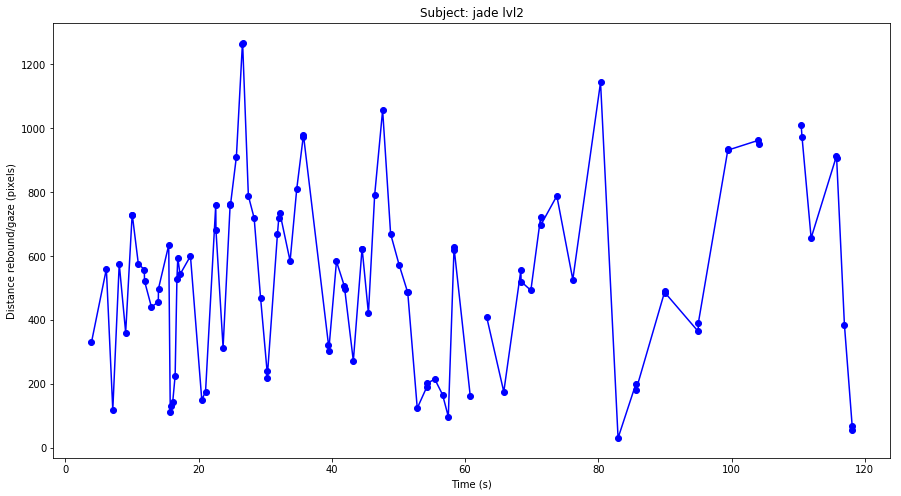

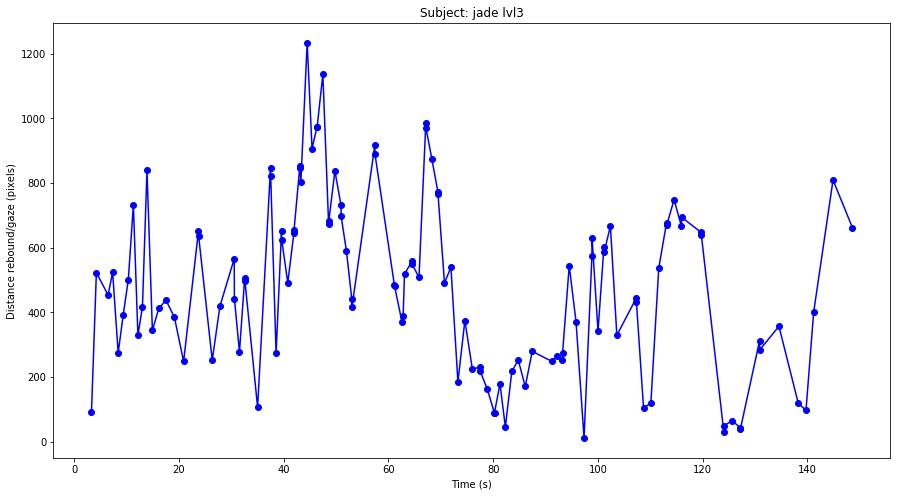

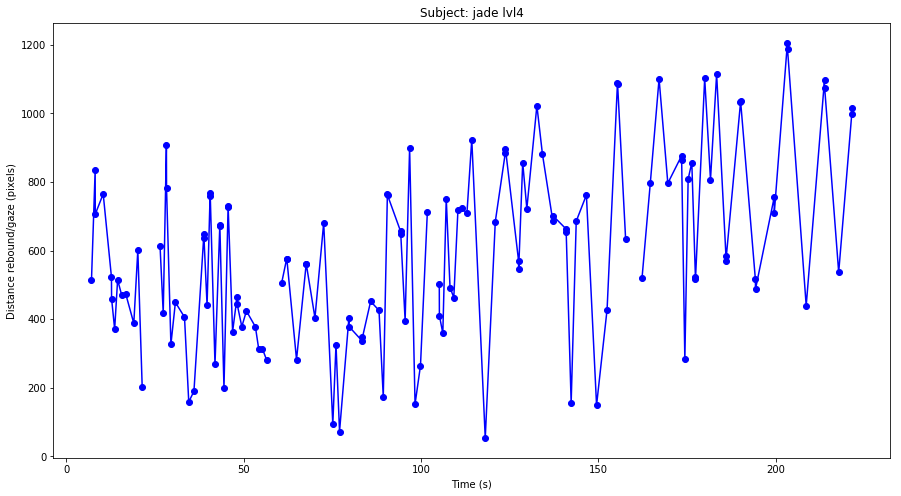

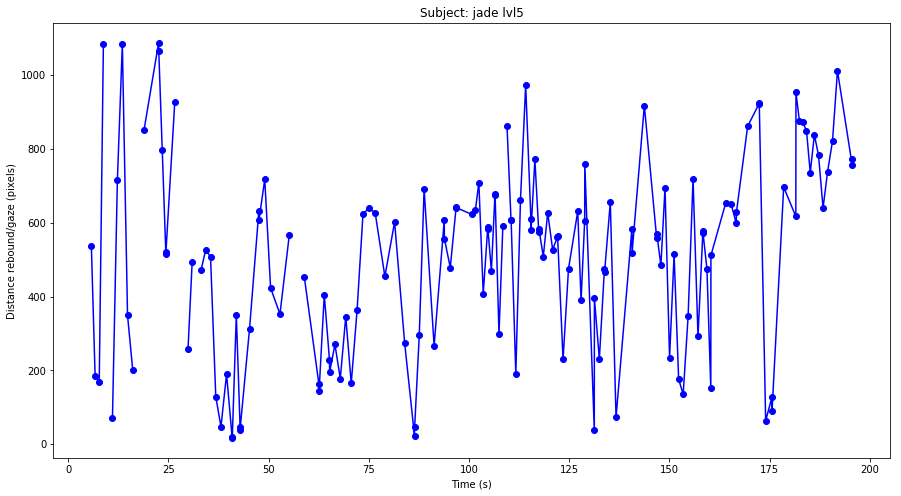

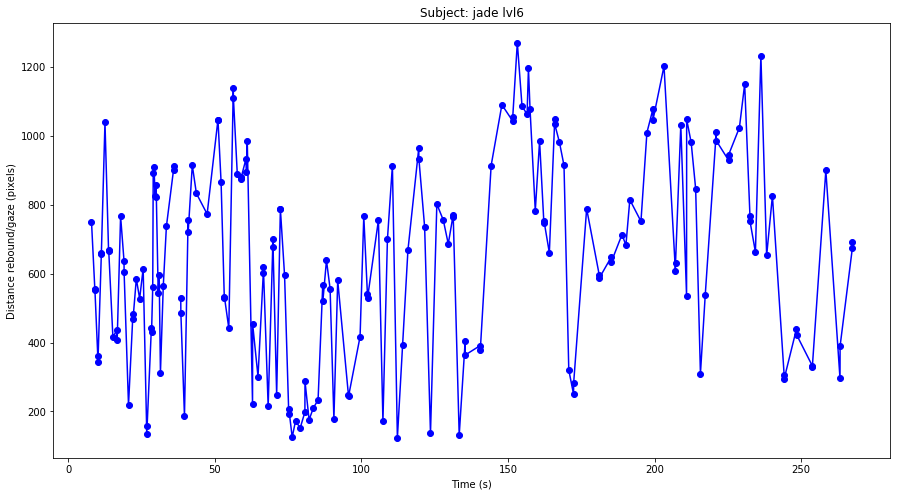

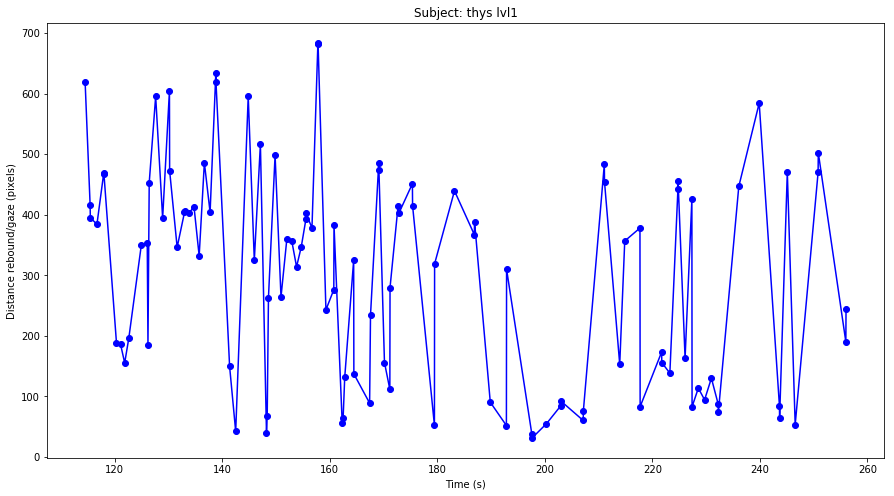

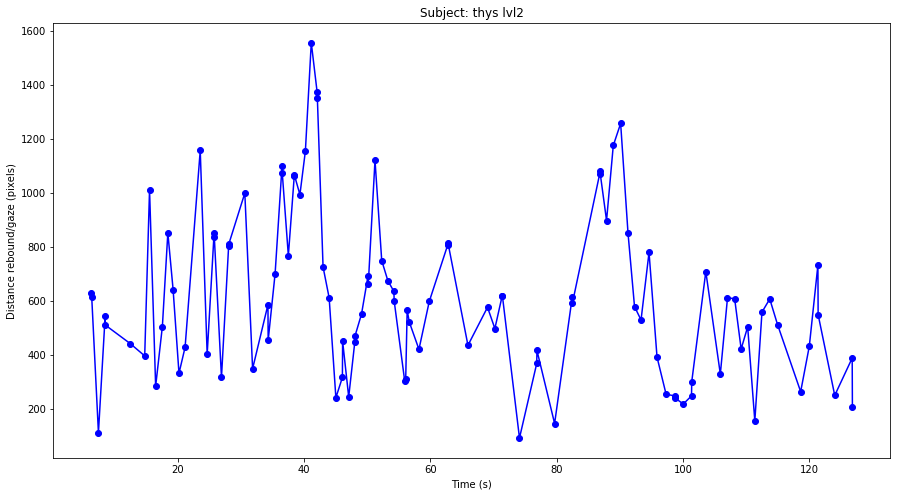

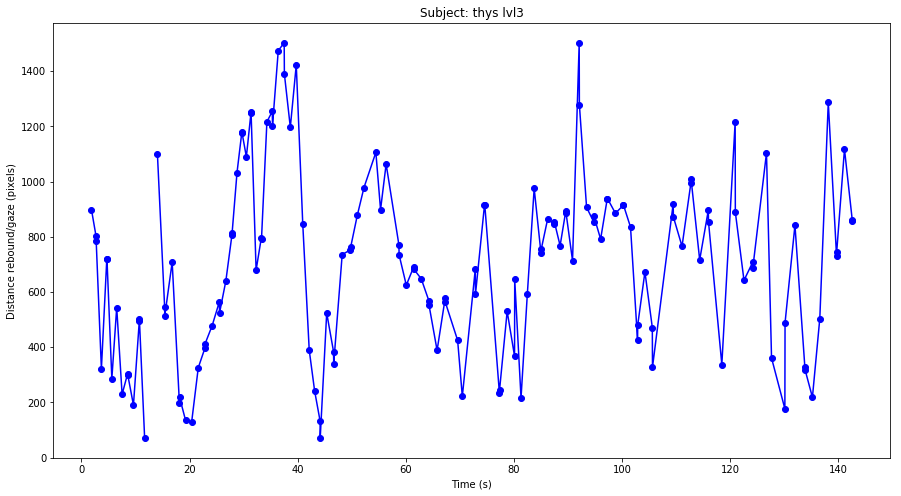

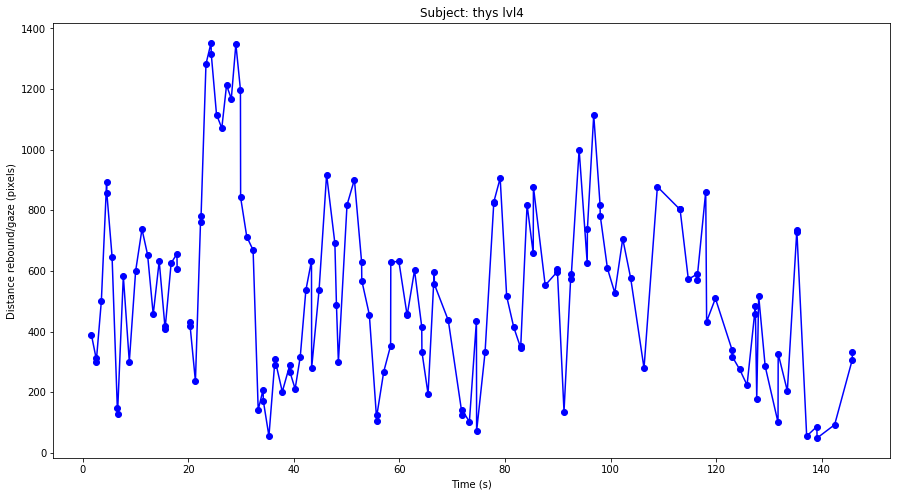

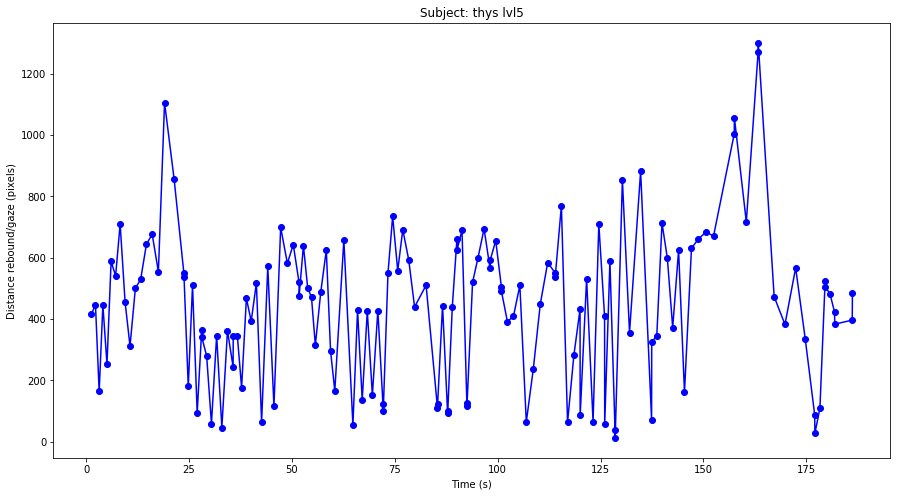

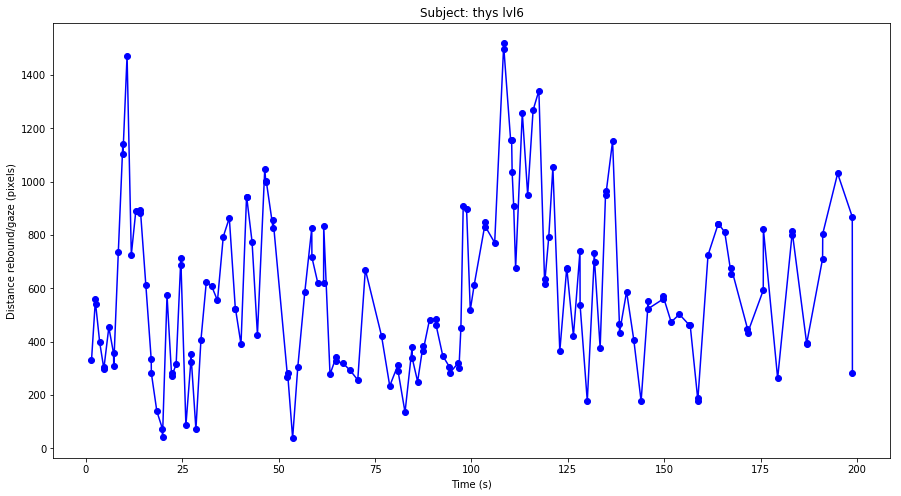

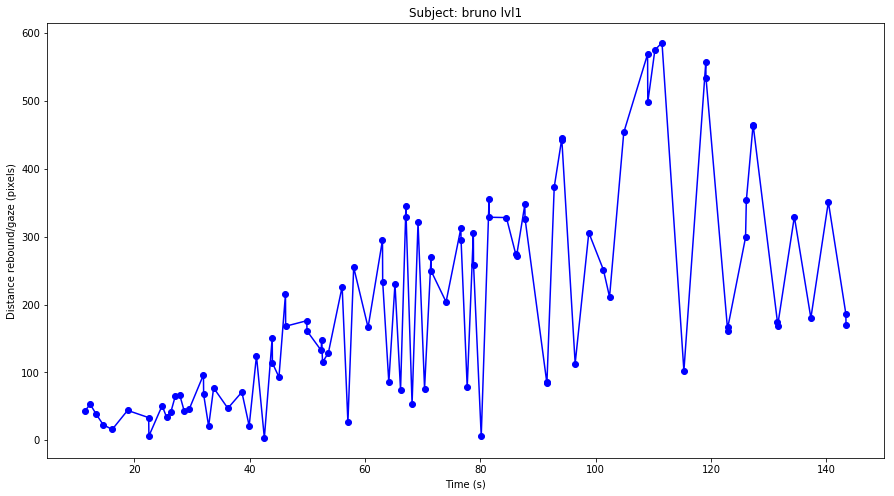

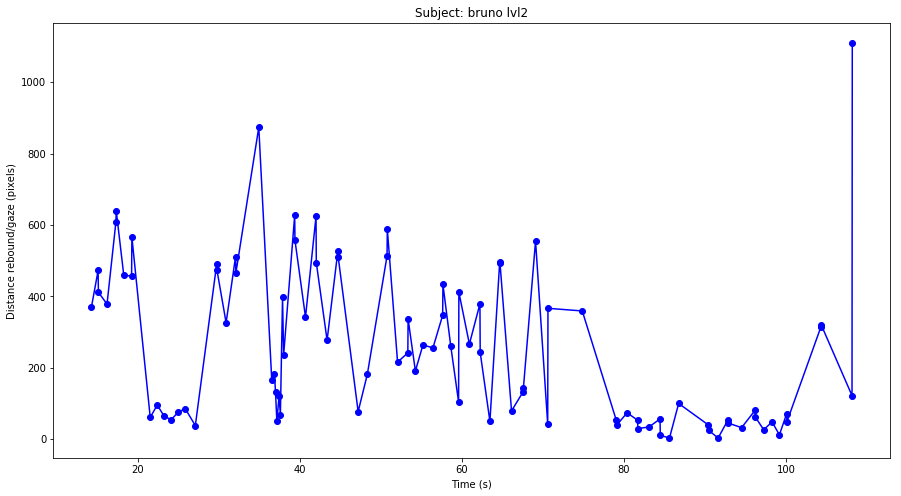

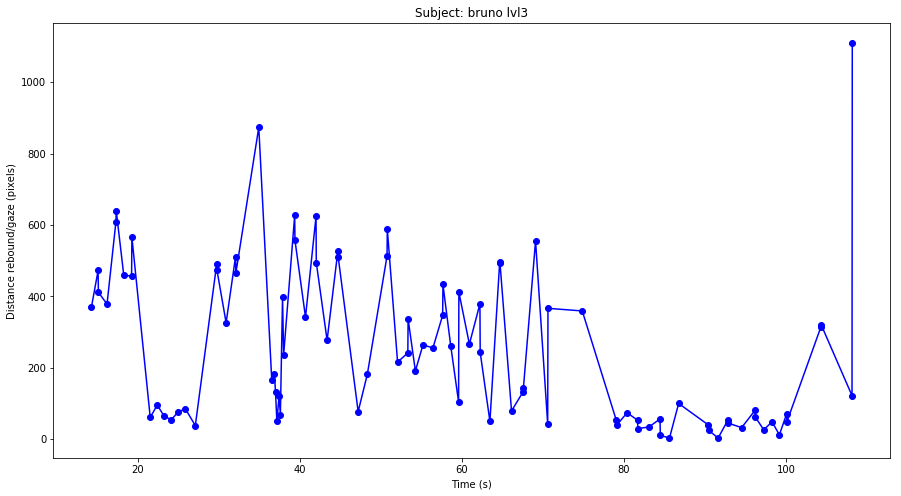

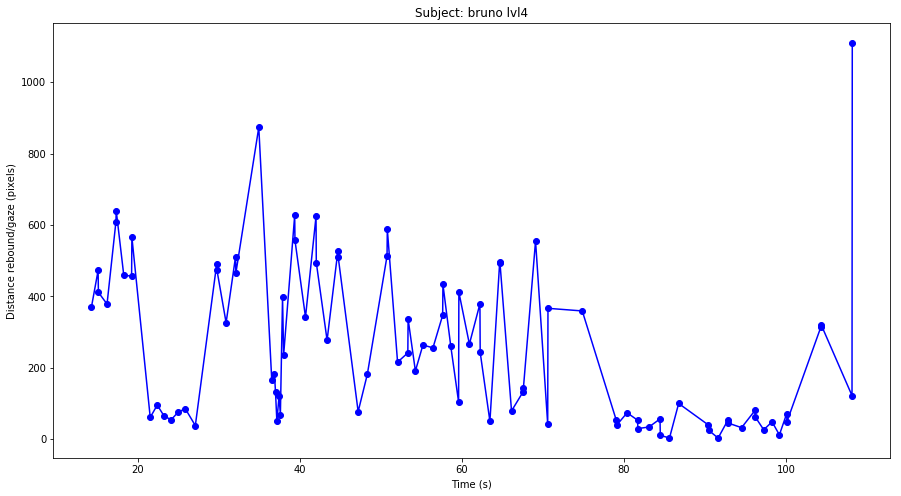

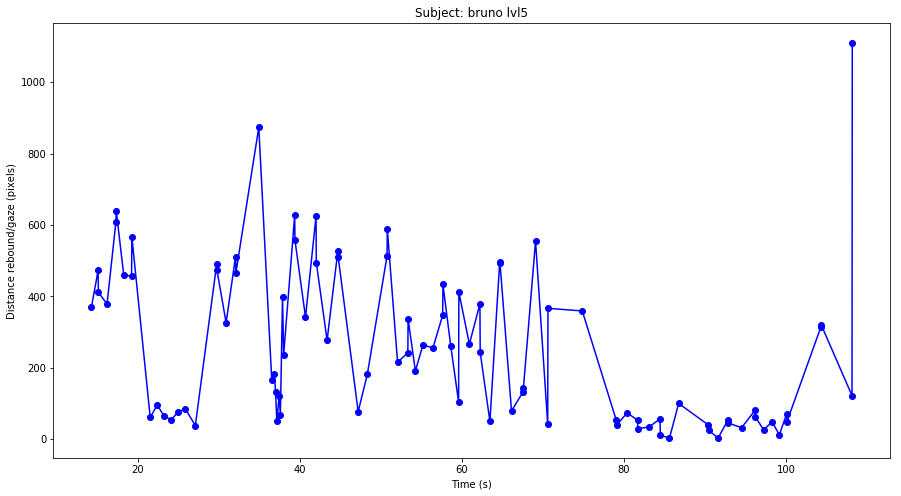

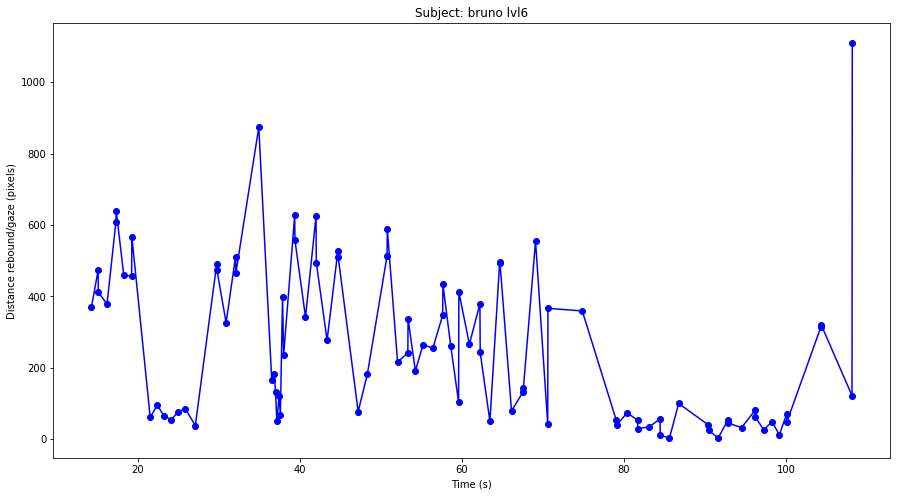

In [16]:
for subj in subjects:
    for level in levels:
        if subj in ['remi', 'valerie', 'jade', 'thys', 'bruno']:
            fig, ax = plt.subplots(figsize=(15,8))
            ax.plot(time[subj][level], separation[subj][level], 'bo-')
            ax.set_title('Subject: ' + subj + ' ' + level)
            ax.set_xlabel('Time (s)')
            ax.set_ylabel('Distance rebound/gaze (pixels)')

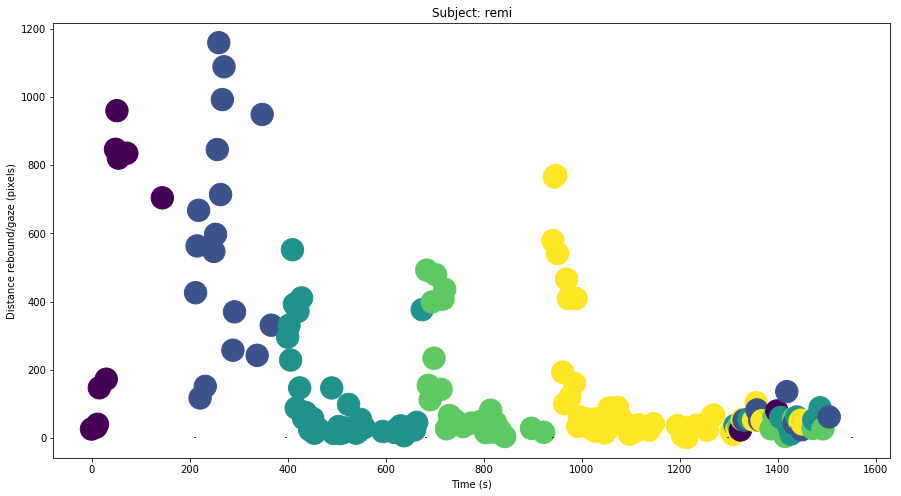

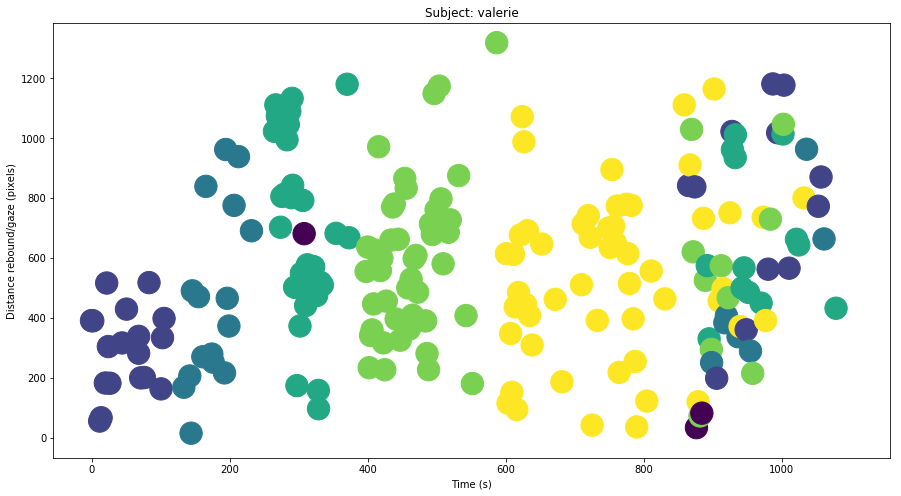

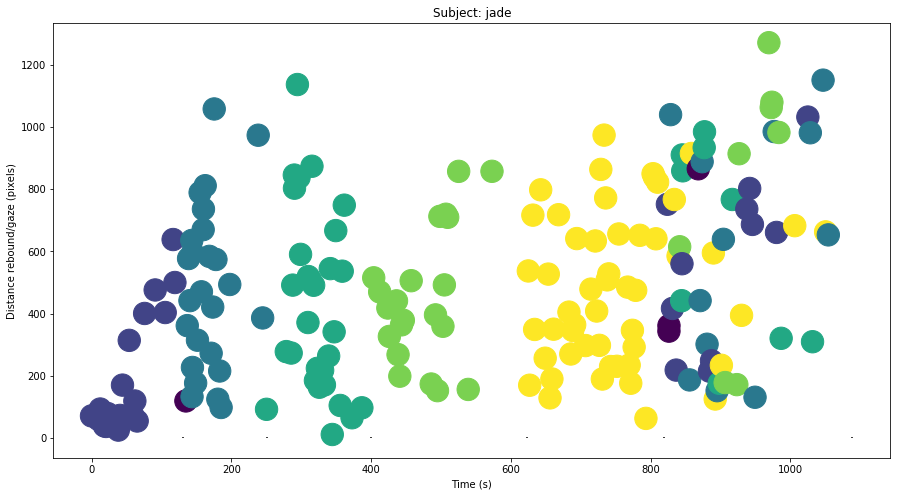

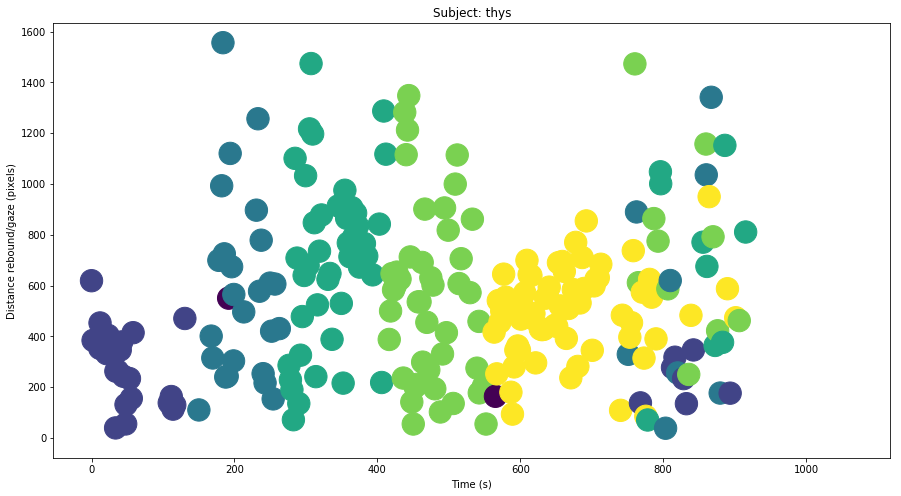

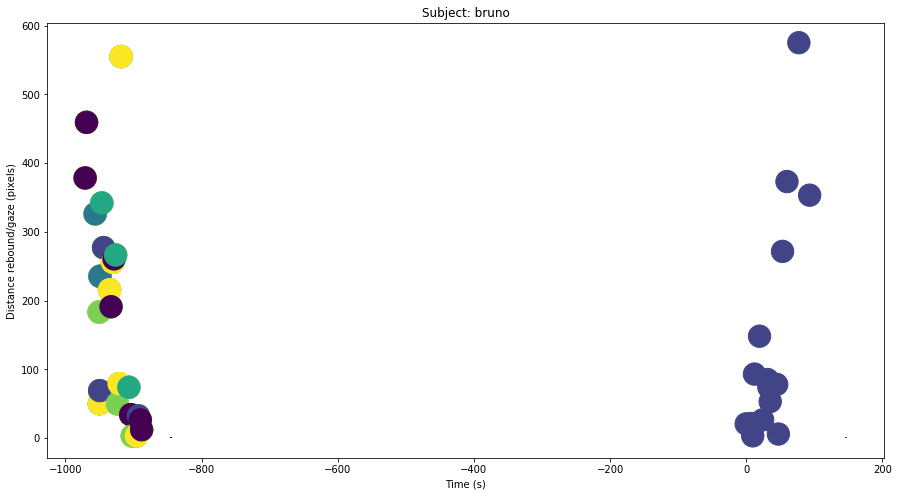

In [19]:
for subj in subjects:
    if subj in ['remi', 'valerie', 'jade', 'thys', 'bruno']:
        fig, ax = plt.subplots(figsize=(15,8))
        ax.scatter(t_rebound_[subj]-t_rebound_[subj][0], separation_[subj], c=p_[subj], s=500, cmap='viridis')
        for sep in lvl_sep[subj]:
            ax.plot([sep, sep], [0, 1.75], 'k--')
        ax.set_title('Subject: ' + subj)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Distance rebound/gaze (pixels)')

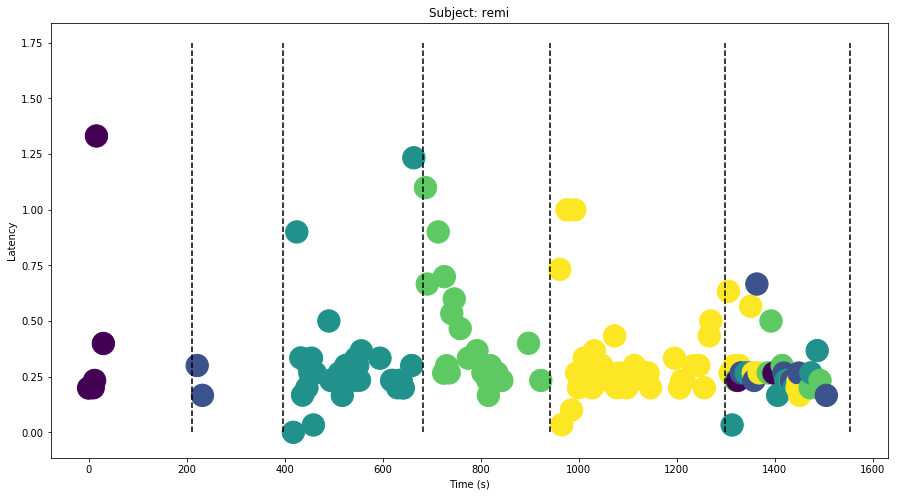

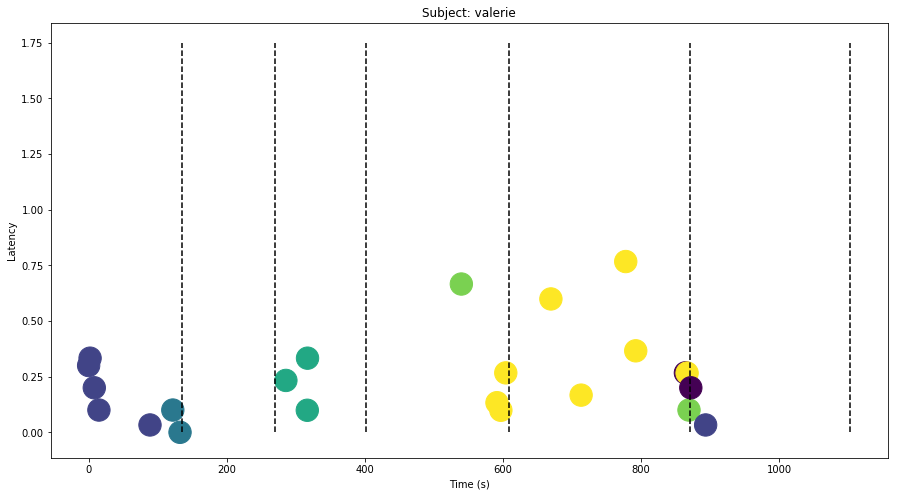

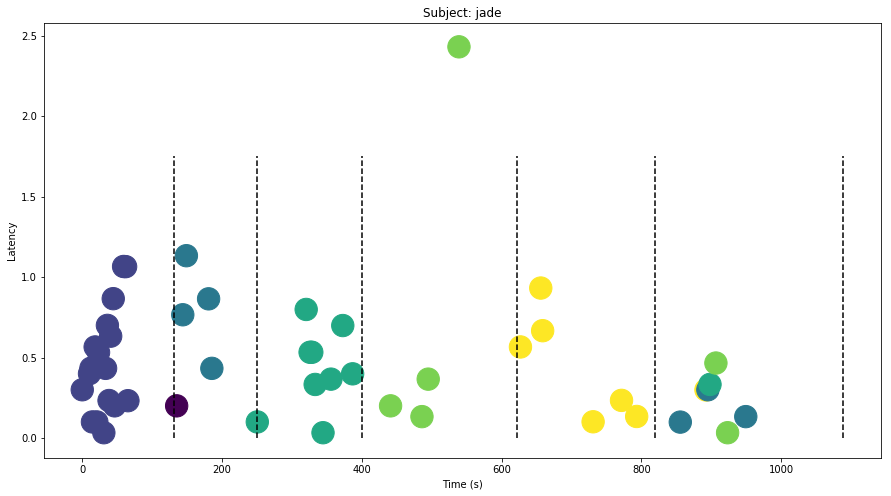

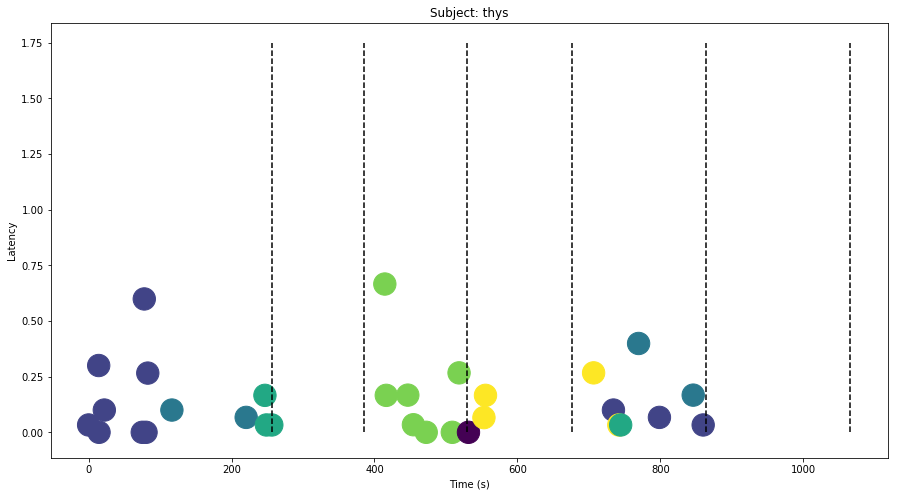

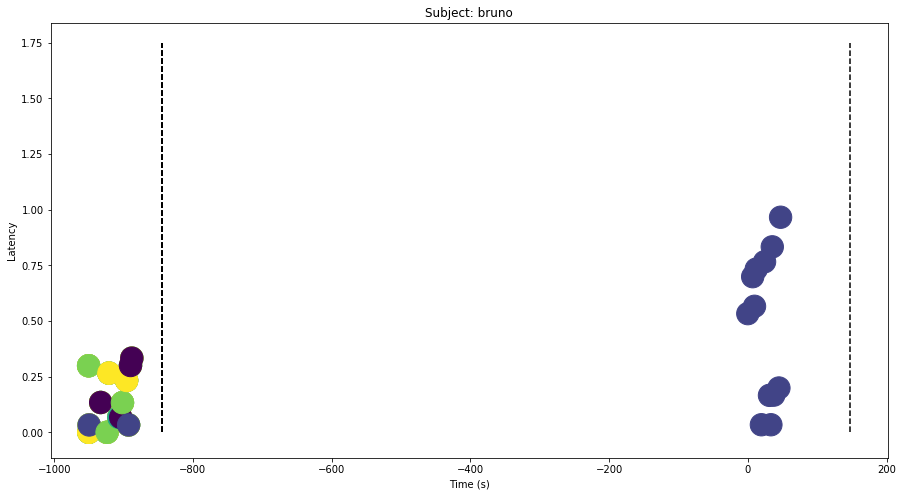

In [8]:
for subj in subjects:
    if subj in ['remi', 'valerie', 'jade', 'thys', 'bruno']:
        fig, ax = plt.subplots(figsize=(15,8))
        ax.scatter(t_rebound[subj]-t_rebound[subj][0], t_sacc[subj], c=p[subj], s=500, cmap='viridis')
        for sep in lvl_sep[subj]:
            ax.plot([sep, sep], [0, 1.75], 'k--')
        ax.set_title('Subject: ' + subj)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Latency')
        # violet : p=0
        # bleu : p=0.25
        # bleu clair : p=0.5
        # vert : p=0.75
        # jaune : p=1

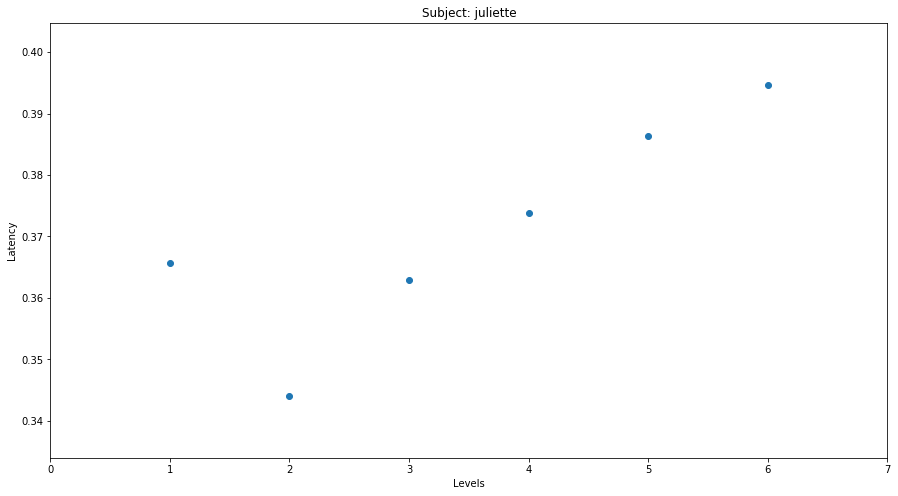

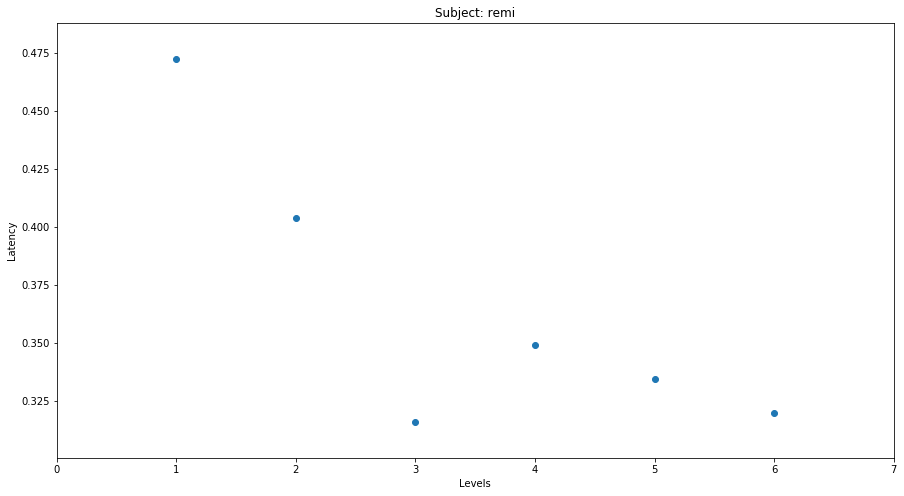

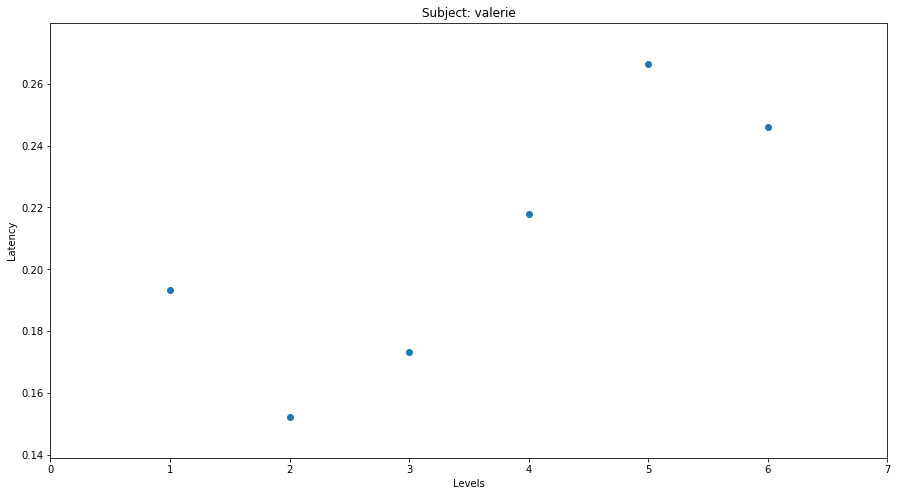

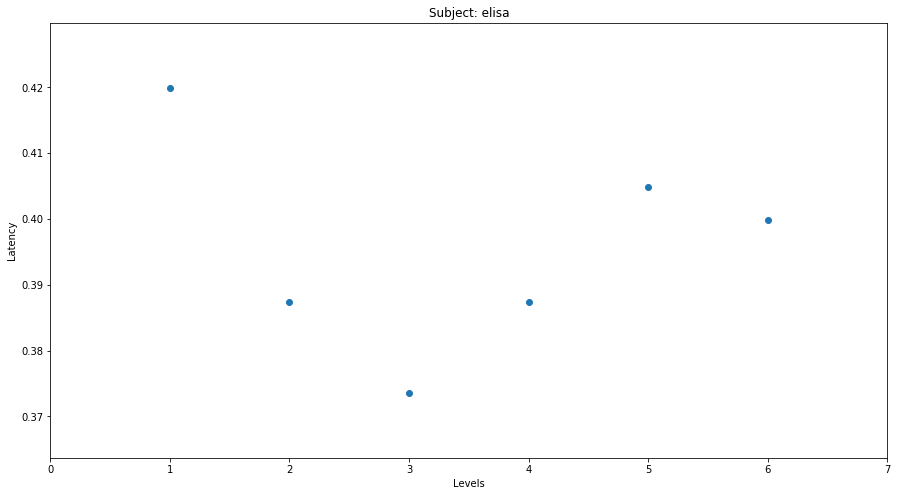

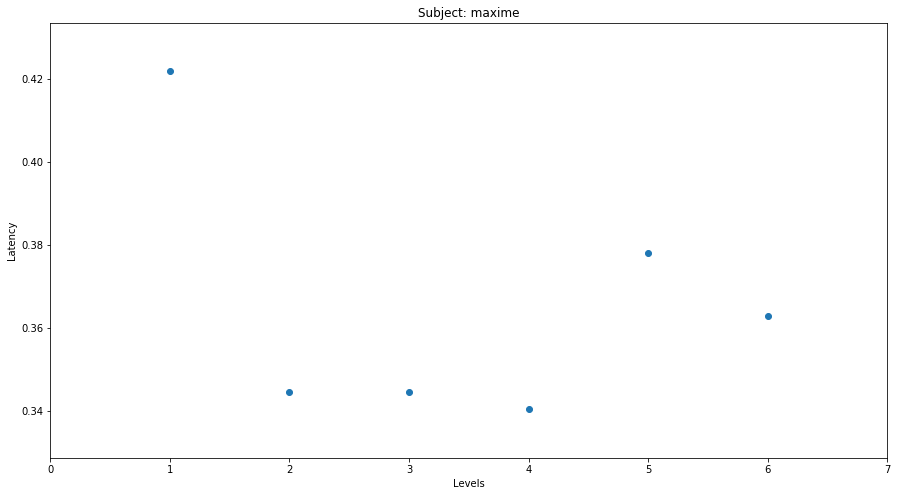

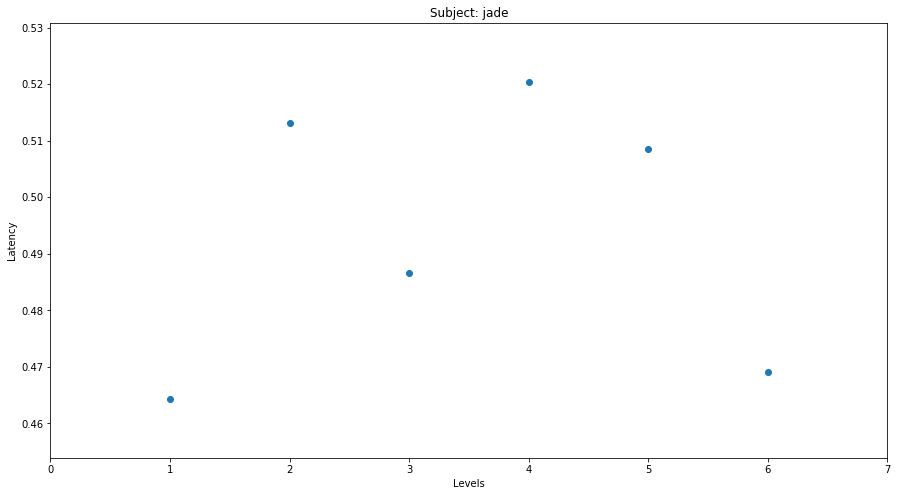

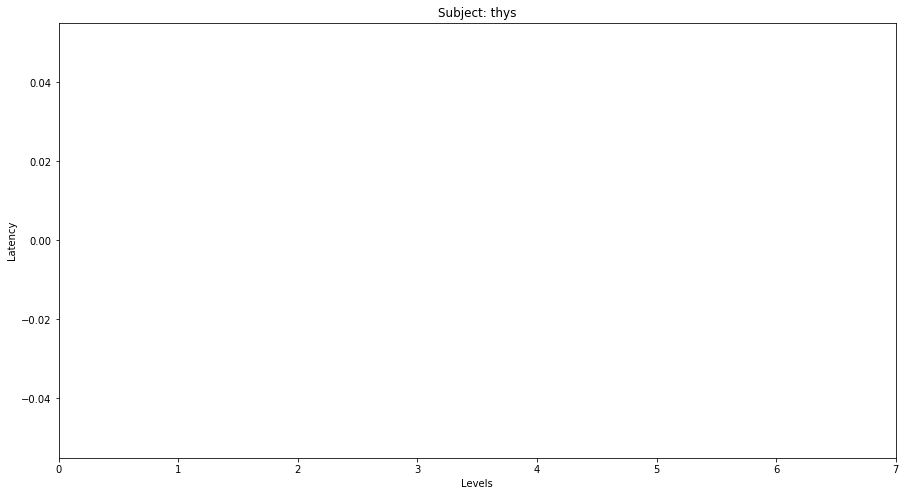

In [80]:
for subj in subjects:
    fig, ax = plt.subplots(figsize=(15,8))
    ax.scatter(lvl[subj], t_mean[subj])
    ax.set_title('Subject: ' + subj)
    ax.set_xlabel('Levels')
    ax.set_ylabel('Latency')
    ax.set_xlim(0, 7)

distribution des latences pour chaque niveau de p (+ paddle) - au debut pour chaque sujet
